In [1]:
import En_na
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

In [2]:
def do_En_preprocessing(text, customized_stopwords):
    cleaned_content = re.sub(r'[^\w\d\s]','',text) # To remove symbols
    cleaned_content = cleaned_content.lower() # Case conversion, upper -> lower
    word_tokens = nltk.word_tokenize(cleaned_content) # Tokenization
    tokens_pos = nltk.pos_tag(word_tokens) # POS tagging
    NN_words = []   # To select nouns
    for word, pos in tokens_pos:
        if 'NN' in pos:
            NN_words.append(word)
            
    wlem = nltk.WordNetLemmatizer()   # Lemmatization
    lemmatized_words = []
    for word in NN_words:
        lemmatized_words.append(wlem.lemmatize(word))
    # 불용어 제거    
    stopwords_list = stopwords.words('english')
    unique_NN_words = set(lemmatized_words)
    final_NN_words = lemmatized_words.copy()
    for word in unique_NN_words:
        if word in stopwords_list:
            while word in final_NN_words: 
                final_NN_words.remove(word)
    
    unique_NN_words1 = set(final_NN_words)
    for word in unique_NN_words1:
        if word in customized_stopwords:
            while word in final_NN_words: 
                final_NN_words.remove(word)
    
    return final_NN_words

In [7]:
# Counter 클래스의 결과물로부터 단어들만을 추출합니다.
def get_words(counter_results):
    words = []
    for word, fre in counter_results:
        words.append(word)
    return words

In [4]:
# 텍스트 데이터를 읽어 옵니다.
with open('nytimes.txt', 'r', encoding='utf8') as f:
    content = f.read()

In [5]:
# 사용자 불용어 사전의 예
customized_stopwords = ['today', 'yesterday', 'new', 'york', 'time'] 

In [8]:
NN_words = do_En_preprocessing(content, customized_stopwords)
c = Counter(NN_words)

In [9]:
# 빈도를 기준으로한 상위 10개 단어
c.most_common(10)

[('health', 11),
 ('people', 11),
 ('researcher', 7),
 ('study', 6),
 ('tie', 6),
 ('interaction', 5),
 ('friend', 4),
 ('others', 4),
 ('exercise', 4),
 ('connection', 3)]

In [10]:
# get_words() 사용자 함수를 이용해 단어들만 추출
selected_words = get_words(c.most_common(10))

In [11]:
print(selected_words)

['health', 'people', 'researcher', 'study', 'tie', 'interaction', 'friend', 'others', 'exercise', 'connection']


In [ ]:
selected_words = ['health', 'study', ]

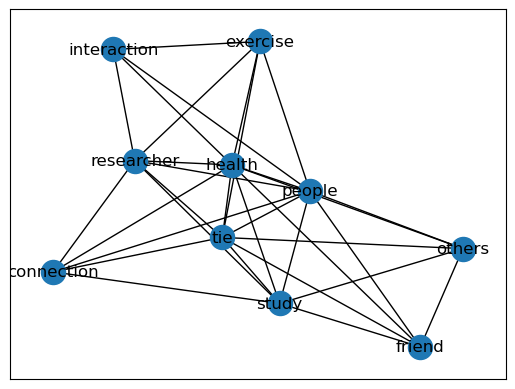

In [12]:
g = En_na.do_na(content, selected_words)
nx.write_graphml(g, 'En_test.graphml')
nx.draw_networkx(g)
plt.show()

In [13]:
g['health']

AtlasView({'interaction': {'weight': 3}, 'study': {'weight': 2}, 'tie': {'weight': 3}, 'people': {'weight': 3}, 'others': {'weight': 1}, 'friend': {'weight': 1}, 'connection': {'weight': 1}, 'researcher': {'weight': 4}, 'exercise': {'weight': 1}})

In [14]:
g['exercise']

AtlasView({'researcher': {'weight': 2}, 'tie': {'weight': 1}, 'people': {'weight': 1}, 'health': {'weight': 1}, 'interaction': {'weight': 1}})

## 중심도 계산하기

In [20]:
nx.degree_centrality(g)

{'health': 1.0,
 'people': 1.0,
 'researcher': 0.7777777777777777,
 'study': 0.7777777777777777,
 'tie': 0.8888888888888888,
 'interaction': 0.4444444444444444,
 'friend': 0.5555555555555556,
 'others': 0.5555555555555556,
 'exercise': 0.5555555555555556,
 'connection': 0.5555555555555556}

In [21]:
# 디그리 중심도
sorted(nx.degree_centrality(g).items(), key=lambda x:x[1],reverse=True)

[('health', 1.0),
 ('people', 1.0),
 ('tie', 0.8888888888888888),
 ('researcher', 0.7777777777777777),
 ('study', 0.7777777777777777),
 ('friend', 0.5555555555555556),
 ('others', 0.5555555555555556),
 ('exercise', 0.5555555555555556),
 ('connection', 0.5555555555555556),
 ('interaction', 0.4444444444444444)]

In [14]:
# 매개 중심도
sorted(nx.betweenness_centrality(g).items(), key=lambda x:x[1],reverse=True)

[('health', 0.20370370370370372),
 ('people', 0.11574074074074071),
 ('researcher', 0.0810185185185185),
 ('study', 0.060185185185185175),
 ('tie', 0.039351851851851846),
 ('interaction', 0.0),
 ('friend', 0.0),
 ('others', 0.0),
 ('exercise', 0.0),
 ('connection', 0.0)]

In [15]:
# 근접 중심도
sorted(nx.closeness_centrality(g).items(), key=lambda x:x[1],reverse=True)

[('health', 1.0),
 ('people', 0.9),
 ('researcher', 0.8181818181818182),
 ('study', 0.8181818181818182),
 ('tie', 0.75),
 ('others', 0.6428571428571429),
 ('connection', 0.6428571428571429),
 ('interaction', 0.6),
 ('friend', 0.6),
 ('exercise', 0.6)]